In [41]:
import matplotlib.pyplot as plt
import random
import numpy as np
from math import e

inputs = np.array([[1,1], 
                   [1,0],
                   [0,1],
                   [0,0]])

labels_and  = np.array([1, 0, 0, 0])
labels_or   = np.array([1, 1, 1, 0])
labels_nand = np.array([0, 1, 1, 1])
labels_nor  = np.array([0, 0, 0, 1])
labels_xor  = np.array([0, 1, 1, 0])

epochs = 1000

def sigmoid(x):
    return 1/(1+e**-x)

def sigmoidprime(x):
    return sigmoid(x)-sigmoid(x)**2

In [42]:
class Perceptron:

    def sigmoid(x):
        return 1/(1+e**-x)

    def sigmoidprime(x):
        return sigmoid(x)-sigmoid(x)**2


    def __init__(self, input_units:int):
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        self.alpha = 1.0

    def forward_step(self, inputs):
        self.input = inputs
        self.z = np.sum(np.multiply(inputs, self.weights)) + self.bias
        return sigmoid(self.z)

    def update(self, delta):
        self.weights = self.weights - (self.alpha * delta * np.array(self.input))
        self.bias = self.bias - self.alpha * delta

In [43]:
class MLP:

    def __init__(self):
        self.hidden_layer = np.array([Perceptron(2) for i in range(4)])
        self.output_neuron = Perceptron(4)

    def forward_step(self, inputs):
        z1 = self.hidden_layer[0].forward_step(inputs)
        z2 = self.hidden_layer[1].forward_step(inputs)
        z3 = self.hidden_layer[2].forward_step(inputs)
        z4 = self.hidden_layer[3].forward_step(inputs)

        return self.output_neuron.forward_step([z1, z2, z3, z4])

    def backward_step(self, inputs, label):

        pred = self.forward_step(inputs)

        delta_output_layer = -(label - pred) * sigmoidprime(np.sum(self.output_neuron.z))

        delta_hidden_layer = [delta_output_layer * self.output_neuron.weights[i] * sigmoidprime(self.hidden_layer[i].z)
                            for i in range(len(self.output_neuron.weights))]

        self.output_neuron.update(delta_output_layer)

        [self.hidden_layer[i].update(delta_hidden_layer[i]) for i in range(len(self.hidden_layer))]

In [44]:
def train_mlp(mlp, target):
    t = target
    loss = []
    accuracy = []
    steps = []

    for i in range(epochs):
        steps.append(i)
        loss_sum = 0
        accuracy_sum = 0
        
        for j in random.sample(range(4), 4):
            output = mlp.forward_step(inputs[j])
            mlp.backward_step(inputs[j], t[j])
            loss_sum += (t[j] - output)**2
            
            if(t[j] == 0):
                accuracy_sum += int(bool(output < 0.5))
            elif(t[j] == 1):
                accuracy_sum += int(bool(output > 0.5))
        
        loss.append(loss_sum/4)
        accuracy.append(accuracy_sum/4)
        
    return loss, accuracy, steps

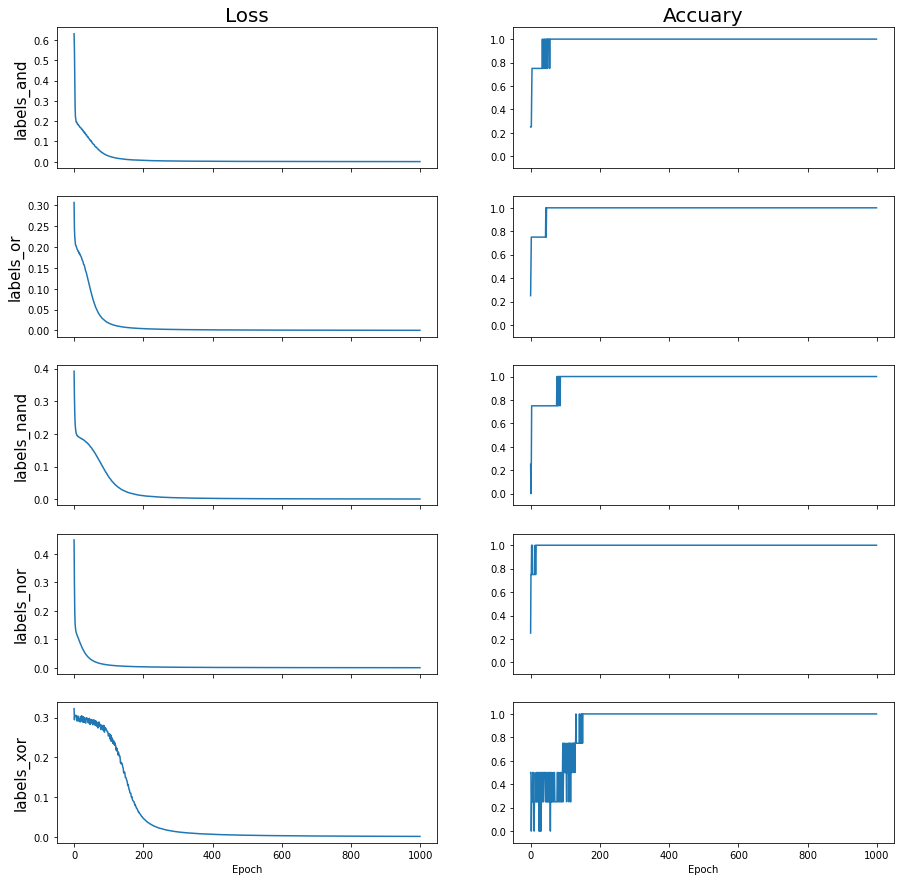

In [45]:
fig, axes = plt.subplots(figsize = (15, 15), nrows = 5, ncols=2, sharex = True)

axes[0][0].set_title('Loss', size=20)
axes[0][1].set_title('Accuary', size=20)
axes[4][0].set_xlabel('Epoch')
axes[4][1].set_xlabel('Epoch')

for f in range(5):
    axes[f, 1].set_ylim(-0.1, 1.1)

mlp = MLP()

loss, accuracy, steps = train_mlp(mlp, labels_and)

axes[0][0].set_ylabel('labels_and', size=15)

axes[0][0].plot(steps, loss)

axes[0][1].plot(steps, accuracy)


mlp = MLP()
loss, accuracy, steps = train_mlp(mlp, labels_or)
axes[1][0].set_ylabel('labels_or', size=15)
axes[1][0].plot(steps, loss)
axes[1][1].plot(steps, accuracy)

mlp = MLP()
loss, accuracy, steps = train_mlp(mlp, labels_nand)
axes[2][0].set_ylabel('labels_nand', size=15)
axes[2][0].plot(steps, loss)
axes[2][1].plot(steps, accuracy)

mlp = MLP()
loss, accuracy, steps = train_mlp(mlp, labels_nor)
axes[3][0].set_ylabel('labels_nor', size=15)
axes[3][0].plot(steps, loss)
axes[3][1].plot(steps, accuracy)

mlp = MLP()
loss, accuracy, steps = train_mlp(mlp, labels_xor)
axes[4][0].set_ylabel('labels_xor', size=15)
axes[4][0].plot(steps, loss)
axes[4][1].plot(steps, accuracy)